In [1]:
import pickle
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
%matplotlib inline

In [6]:
#creating dataframe to analyse outlier stations with energies 
#dfhigh and dflow are the finished products 

df=pd.read_pickle('BBresults.pkl')
df=df[df['channel']=='EHZ']
df = pd.DataFrame(df['coordinates'].tolist(), columns=['loc_lat', 'loc_lon'])

df2=pd.read_pickle('NormMeanErgs.pkl')
#df2=df2[df2['channel']=='EHZ']
df2 = pd.DataFrame(df2['Normalization'].tolist(), columns=['Normalization'])

df=pd.concat([df, df2], axis=1)
dfhigh=df[df['Normalization']>5]
dflow=df[df['Normalization']<-5]
df

,loc_lat,loc_lon,Normalization
0,-34.900901,138.637843,1.238248
1,-38.018018,145.296522,0.715546
2,-41.423423,148.272234,2.597681
3,-4.288288,152.011988,3.765609
4,-31.954955,141.440511,0.161231
...,...,...,...
20678,28.063063,83.250887,NaN
20679,36.792793,127.116010,NaN
20680,28.198198,84.735992,NaN
20681,28.198198,84.389051,NaN


In [3]:
df1 = pd.read_pickle('BBresults.pkl')
pd.set_option('display.max_columns', None)


split_df = pd.DataFrame(df1['coordinates'].tolist(), columns=['loc_lat', 'loc_lon'])
df1 = pd.concat([df1, split_df], axis=1)
dfBB=df1[df1['channel'] == 'BHZ'] #sorting results for just broadband responses 
dfR=df1[df1['channel'] == 'EHZ']
dfRS=dfR[dfR['npts']==36001]
dfRS

,netstatchan,network,station,location,channel,starttime,endtime,phasePtime,sampling_rate,delta,npts,calib,az,baz,coordinates,distance,pinc,prayp,ptoa,estFgP2,FgP2,est2corr,tacer,ebbmedtac,ehfmedtac,ebbcorrmedtac,ehfcorrmedtac,ebbpertac,ehfpertac,ebbcorrpertac,ehfcorrpertac,ebbcorrpertacmean,eventname,elat,elon,edepth,strike,dip,rake,ebbcorrpertaclognorm,loc_lat,loc_lon
4280,AM.R9CDF.00.EHZ,AM,R9CDF,00,EHZ,2022-05-26T15:42:42.301999Z,2022-05-26T15:48:42.301999Z,2022-05-26T15:43:42.299359Z,100.0,0.01,36001,1.0,230.439282,64.338401,"[-38.01801802, 145.2965215]","[3063212.8018230204, 27.535286757106846]",27.867992,513.454306,31.75273,1.015386,0.277504,3.658993,55,4.107885e+14,1.796308e+12,1.503072e+15,6.572678e+12,4.550283e+14,3.321385e+12,1.664945e+15,1.215293e+13,NaN,2022052601,-22.81,172.14,29.1,277,33,90,NaN,-38.018018,145.296522
4281,AM.RAA90.00.EHZ,AM,RAA90,00,EHZ,2022-05-26T15:42:40.225000Z,2022-05-26T15:48:40.225000Z,2022-05-26T15:43:40.227010Z,100.0,0.01,36001,1.0,221.543111,54.536006,"[-41.42342342, 148.2722338]","[3035625.2134195776, 27.3042191266884]",27.91574,514.263362,31.80862,1.016304,0.258861,3.92606,51,2.269950e+14,1.744706e+12,8.911960e+14,6.849821e+12,2.496985e+14,2.610487e+12,9.803312e+14,1.024893e+13,NaN,2022052601,-22.81,172.14,29.1,277,33,90,NaN,-41.423423,148.272234
4282,AM.RB079.00.EHZ,AM,RB079,00,EHZ,2022-05-26T15:42:36.289000Z,2022-05-26T15:48:36.289000Z,2022-05-26T15:43:36.290982Z,100.0,0.01,36001,1.0,310.413555,135.238864,"[-4.288288288, 152.0119884]","[2982456.0157654737, 26.866319331439303]",28.002072,515.725303,31.909699,1.018062,1.225148,0.83097,39,7.043503e+15,1.149672e+14,5.852942e+15,9.553429e+13,7.062599e+15,1.176001e+14,5.868810e+15,9.772220e+13,NaN,2022052601,-22.81,172.14,29.1,277,33,90,NaN,-4.288288,152.011988
4283,AM.RC74C.00.EHZ,AM,RC74C,00,EHZ,2022-05-26T15:42:52.121000Z,2022-05-26T15:48:52.121000Z,2022-05-26T15:43:52.125055Z,100.0,0.01,36001,1.0,244.760611,79.198898,"[-31.95495495, 141.4405111]","[3188296.1948399195, 28.636011832103193]",27.626445,509.35598,31.470127,1.011099,0.35509,2.847444,26,6.609119e+15,1.240719e+13,1.881909e+16,3.532878e+13,4.806554e+15,9.604259e+12,1.368639e+16,2.734759e+13,NaN,2022052601,-22.81,172.14,29.1,277,33,90,NaN,-31.954955,141.440511
4284,AM.RC98F.00.EHZ,AM,RC98F,00,EHZ,2022-05-26T15:42:48.896999Z,2022-05-26T15:48:48.896999Z,2022-05-26T15:43:48.901962Z,100.0,0.01,36001,1.0,232.67141,67.164388,"[-37.36936937, 143.9003982]","[3145930.3910365356, 28.273963791309452]",27.709946,510.773759,31.567794,1.012493,0.289042,3.502931,36,1.461522e+14,1.836142e+12,5.119612e+14,6.431878e+12,1.394102e+14,1.787071e+12,4.883444e+14,6.259987e+12,NaN,2022052601,-22.81,172.14,29.1,277,33,90,NaN,-37.369369,143.900398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26288,AM.S2D97.00.EHZ,AM,S2D97,00,EHZ,2021-01-11T21:37:36.692000Z,2021-01-11T21:43:36.692000Z,2021-01-11T21:38:36.693417Z,100.0,0.01,36001,1.0,215.616837,24.392683,"[28.06306306, 83.25088716]","[2954773.0920904893, 26.587389915813343]",28.068447,516.848497,28.135272,1.019194,1.186112,0.859273,17,1.919146e+15,1.447292e+14,1.649070e+15,1.243619e+14,1.832762e+15,1.306177e+14,1.574842e+15,1.122363e+14,3.278537e+15,2021011100,51.32,100.39,13.9,355,43,-143,-0.318443,28.063063,83.250887
26289,AM.S4458.00.EHZ,AM,S4458,00,EHZ,2021-01-11T21:37:11.884000Z,2021-01-11T21:43:11.884000Z,2021-01-11T21:38:11.883563Z,100.0,0.01,36001,1.0,116.975589,315.884972,"[36.79279279, 127.1160104]","[2656562.6724434416, 23.85654257449571]",28.475164,523.715718,28.543136,1.030768,1.457816,0.707063,19,2.810667e+14,8.329267e+12,1.987318e+14,5.889316e+12,2.790040e+14,7.724383e+12,1.972734e+14,5.461624e+12,3.278537e+15,2021011100,51.32,100.39,13.9,355,43,-143,-1.220612,36.792793,127.116010
26290,AM.S8086.00.EHZ,AM,S8086,00,EHZ,2021-01-11T21:37:30.858999Z,2021-01-11T21:43:30.858999Z,2021-01-11T21:38:30.854831Z,100.0,0.01,36001,1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 0, 'Events with Moment Magnitudes 6.5+ from 1/1/2019-7/12/2022')

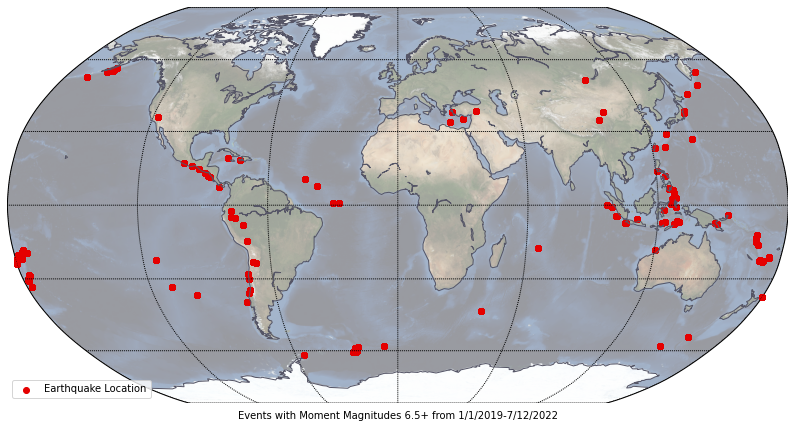

In [9]:
#map of events
cm=plt.cm.get_cmap('magma')
plt.figure(figsize=(14,8))
earth=Basemap(projection='robin', lon_0=0)
earth.drawparallels(np.arange(-90., 120., 30.))
earth.drawmeridians(np.arange(0., 360.,60.))
earth.bluemarble(alpha=0.40)
earth.drawcoastlines(color='#555566', linewidth=1)
x,y=earth(np.array(df1.elon), np.array(df1.elat))
sc =plt.scatter(x,y,cmap=cm, alpha=1, label ='Earthquake Location', color='#e50000')
plt.legend(loc='lower left')
plt.xlabel("Events with Moment Magnitudes 6.5+ from 1/1/2019-7/12/2022")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 0, 'Raspberry Shake Stations Used ')

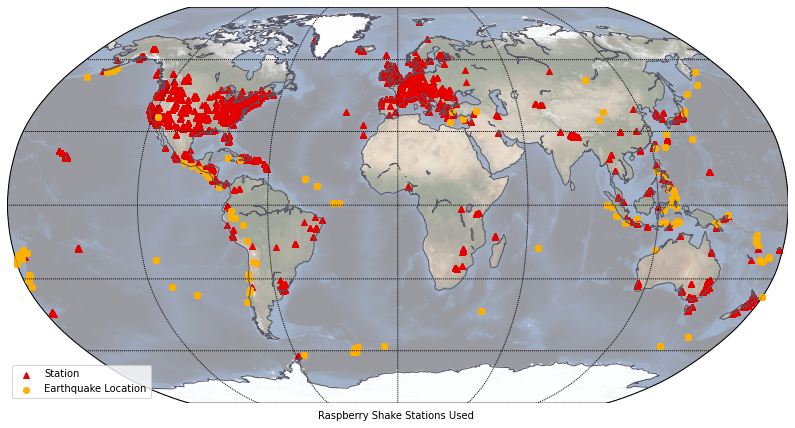

In [11]:
#map of RS Stations used
cm=plt.cm.get_cmap('magma')
plt.figure(figsize=(14,8))
earth=Basemap(projection='robin', lon_0=0)
earth.drawparallels(np.arange(-90., 120., 30.))
earth.drawmeridians(np.arange(0., 360.,60.))
earth.bluemarble(alpha=0.40)
earth.drawcoastlines(color='#555566', linewidth=1)
x,y=earth(np.array(dfRS.loc_lon), np.array(dfRS.loc_lat))
sc =plt.scatter(x,y,cmap=cm, alpha=1, label ='Station', c='#e50000', marker="^")
a,b=earth(np.array(df1.elon), np.array(df1.elat))
sc =plt.scatter(a,b,cmap=cm, alpha=1, label ='Earthquake Location', color='#fcb001')
plt.legend(loc='lower left')
plt.xlabel("Raspberry Shake Stations Used ")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 0, 'Broadband Stations Used')

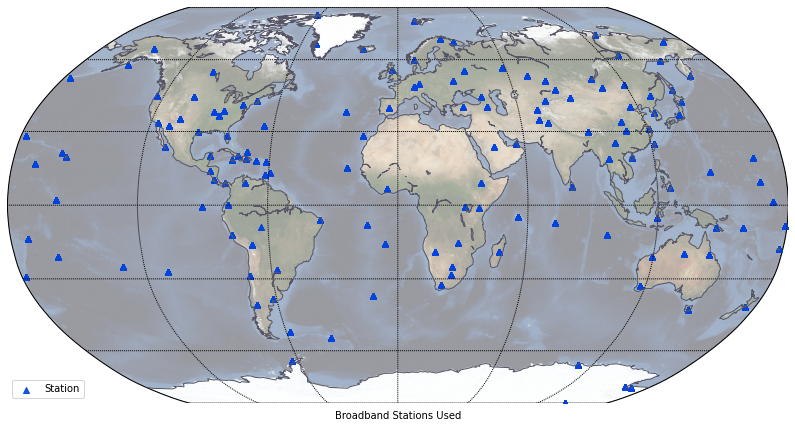

In [10]:
#map of BB stations used 
cm=plt.cm.get_cmap('magma')
plt.figure(figsize=(14,8))
earth=Basemap(projection='robin', lon_0=0)
earth.drawparallels(np.arange(-90., 120., 30.))
earth.drawmeridians(np.arange(0., 360.,60.))
earth.bluemarble(alpha=0.40)
earth.drawcoastlines(color='#555566', linewidth=1)
x,y=earth(np.array(dfBB.loc_lon), np.array(dfBB.loc_lat))
sc =plt.scatter(x,y,cmap=cm, alpha=0.9, label ='Station', color='#0343df',marker="^")
a,b=earth(np.array(df.elon), np.array(df.elat))
sc =plt.scatter(a,b,cmap=cm, alpha=1, label ='Earthquake Location', color='#e50000')
plt.legend(loc='lower left')
plt.xlabel("Broadband Stations Used")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 0, 'Raspberry Shake Stations With a Normalization Higher than 5 ')

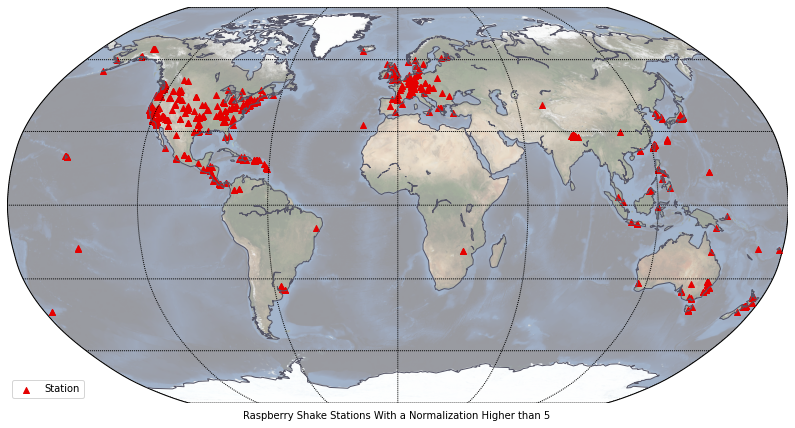

In [12]:
#map of RS Stations with normalization values over 5 
cm=plt.cm.get_cmap('magma')
plt.figure(figsize=(14,8))
earth=Basemap(projection='robin', lon_0=0)
earth.drawparallels(np.arange(-90., 120., 30.))
earth.drawmeridians(np.arange(0., 360.,60.))
earth.bluemarble(alpha=0.40)
earth.drawcoastlines(color='#555566', linewidth=1)
x,y=earth(np.array(dfhigh.loc_lon), np.array(dfhigh.loc_lat))
sc =plt.scatter(x,y,cmap=cm, alpha=1, label ='Station', c='#e50000', marker="^")
plt.legend(loc='lower left')
plt.xlabel("Raspberry Shake Stations With a Normalization Higher than 5 ")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 0, 'Raspberry Shake Stations With a Normalization Lower than -5 ')

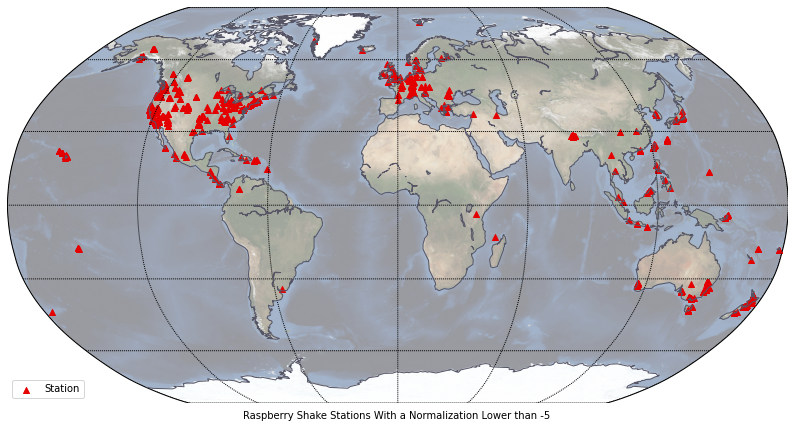

In [13]:
#map of RS Stations with normalization values lower than -5 
cm=plt.cm.get_cmap('magma')
plt.figure(figsize=(14,8))
earth=Basemap(projection='robin', lon_0=0)
earth.drawparallels(np.arange(-90., 120., 30.))
earth.drawmeridians(np.arange(0., 360.,60.))
earth.bluemarble(alpha=0.40)
earth.drawcoastlines(color='#555566', linewidth=1)
x,y=earth(np.array(dflow.loc_lon), np.array(dflow.loc_lat))
sc =plt.scatter(x,y,cmap=cm, alpha=1, label ='Station', c='#e50000', marker="^")
plt.legend(loc='lower left')
plt.xlabel("Raspberry Shake Stations With a Normalization Lower than -5 ")